# Notebook for the prediction presentation

In [1]:
import pandas as pd

from src.features.helpers.load_data import load_test_data, load_train_data

train_data = load_train_data()
test_data = load_test_data()

In [2]:
from src.features.transformers import FillPropertyNaNsTransformer, PropertyOutlierTransformer, ExtractColumnsTransformer
from sklearn.pipeline import Pipeline

preprocessing_pipeline = Pipeline(steps=[
    ('fill_properties_nan_bg', FillPropertyNaNsTransformer(parameter='bg', how=['interpolate', 'median'], interpolate=3, ffill=1, bfill=1, precision=1)),
    ('fill_properties_nan_insulin', FillPropertyNaNsTransformer(parameter='insulin', how=['interpolate', 'median'], interpolate=3, ffill=1, bfill=1, precision=4)),
    ('fill_properties_nan_cals', FillPropertyNaNsTransformer(parameter='cals', how=['interpolate', 'median'], interpolate=3, ffill=1, bfill=1, precision=1)),
    ('fill_properties_nan_hr', FillPropertyNaNsTransformer(parameter='hr', how=['interpolate', 'median'], interpolate=3, ffill=1, bfill=1, precision=1)),
    ('fill_properties_nan_steps', FillPropertyNaNsTransformer(parameter='steps', how=['zero'], interpolate=3, ffill=1, bfill=1, precision=1)),
    ('drop_outliers', PropertyOutlierTransformer(parameter='insulin', filter_function=lambda x: x < 0, fill_strategy='zero')),
])


In [3]:
train_data_preprocessed = preprocessing_pipeline.fit_transform(train_data)
test_data_preprocessed = preprocessing_pipeline.transform(test_data)

test_data_preprocessed

,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:45,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00
id,,,,,,,,,,,,,,,,,,,,,
p01_8459,p01,06:45:00,9.2,9.2,9.5,9.9,10.2,10.2,10.3,10.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p01_8460,p01,11:25:00,9.9,9.9,9.9,9.7,9.6,9.4,9.3,9.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walk,Walk,Walk
p01_8461,p01,14:45:00,5.5,5.5,5.5,5.5,5.5,5.4,5.3,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p01_8462,p01,04:30:00,3.4,3.4,3.6,3.7,3.9,4.2,4.4,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p01_8463,p01,04:20:00,8.3,8.3,8.3,8.9,9.4,10.0,10.7,11.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p24_256,p24,06:40:00,7.3,7.3,7.1,6.7,6.8,6.8,6.9,6.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p24_257,p24,12:30:00,6.0,6.2,6.2,6.2,5.8,5.5,5.7,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p24_258,p24,03:45:00,12.4,12.5,12.7,13.1,13.2,13.3,13.0,12.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
selected_id = 'p01_8468'
#selected_id = 'p24_243'
#selected_id = 'p24_246'
#selected_id = 'p24_248'
selected_row = test_data_preprocessed[test_data_preprocessed.index == selected_id]
selected_row

,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:45,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00
id,,,,,,,,,,,,,,,,,,,,,
p01_8468,p01,12:00:00,14.2,14.2,14.2,14.3,14.3,14.4,14.4,14.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
from src.features.helpers.extractors import extract_patient_data

time_series_data = extract_patient_data(selected_row, selected_row['p_num'].unique()[0])
time_series_data

,p_num,time,bg,insulin,carbs,hr,steps,cals,activity
2020-01-02 06:05:00,p01,06:05:00,14.2,0.0417,NaN,64.0,0.0,4.8,NaN
2020-01-02 06:10:00,p01,06:10:00,14.2,0.0417,NaN,63.3,0.0,4.8,NaN
2020-01-02 06:15:00,p01,06:15:00,14.2,0.0417,NaN,60.9,0.0,4.8,NaN
2020-01-02 06:20:00,p01,06:20:00,14.3,0.0417,NaN,59.1,0.0,4.8,NaN
2020-01-02 06:25:00,p01,06:25:00,14.3,0.0417,NaN,60.0,0.0,4.8,NaN
...,...,...,...,...,...,...,...,...,...
2020-01-02 11:40:00,p01,11:40:00,6.3,0.0583,NaN,85.5,127.0,13.9,NaN
2020-01-02 11:45:00,p01,11:45:00,6.7,0.0583,NaN,90.8,129.0,16.9,NaN
2020-01-02 11:50:00,p01,11:50:00,6.6,0.0583,NaN,95.8,24.0,10.1,NaN
2020-01-02 11:55:00,p01,11:55:00,6.5,0.0583,NaN,83.5,41.0,10.3,NaN


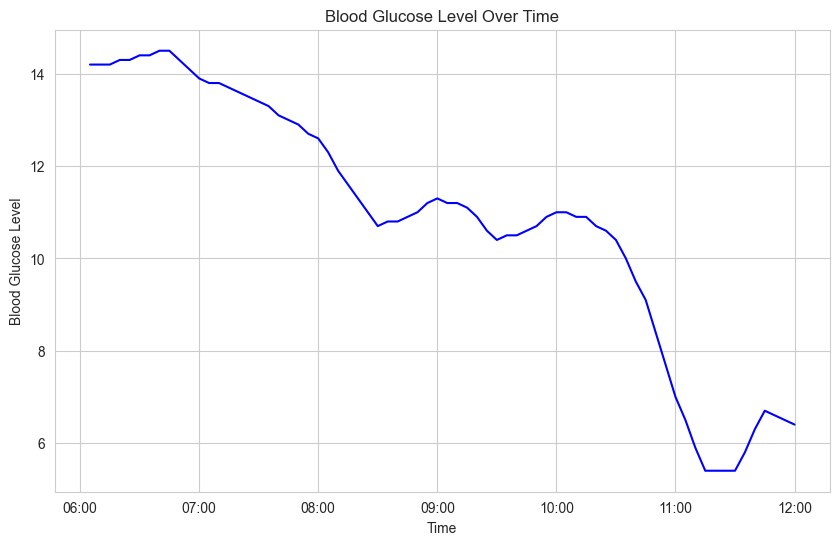

In [6]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(time_series_data['bg'], label='Measured Blood Glucose Level', color='blue')

plt.xlabel('Time')
plt.ylabel('Blood Glucose Level')
plt.title('Blood Glucose Level Over Time')

date_format = mdates.DateFormatter("%H:%M")
plt.gca().xaxis.set_major_formatter(date_format)
plt.show()


In [7]:
from src.features.helpers.extractors import create_lag_features

prediction_data = create_lag_features(time_series_data, test_data.columns, result_time_diff='-1:00')
prediction_data.head()


,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,id
index,,,,,,,,,,,,,,,,,,,,,
2020-01-02 07:05:00,p01,07:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p01_test_12
2020-01-02 07:10:00,p01,07:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p01_test_13
2020-01-02 07:15:00,p01,07:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p01_test_14
2020-01-02 07:20:00,p01,07:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p01_test_15
2020-01-02 07:25:00,p01,07:25:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p01_test_16


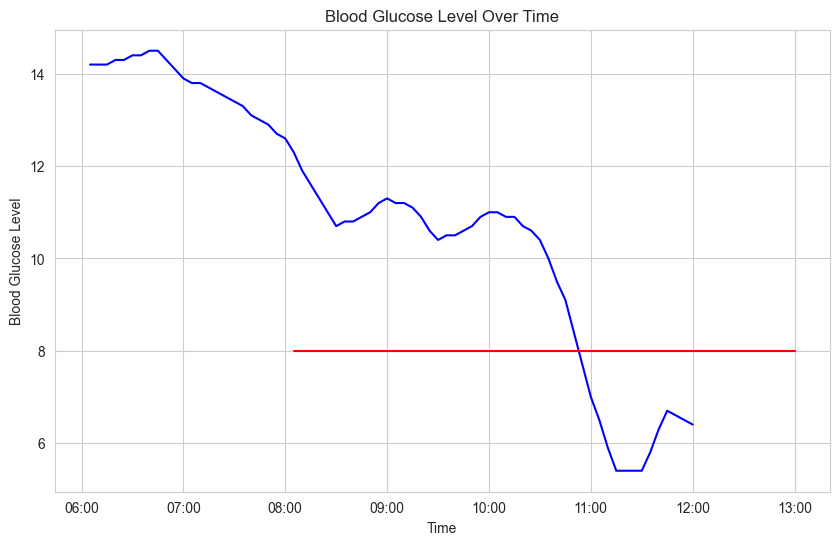

In [8]:
from src.models.model_1.data.load_data import load_data as model_1_load_data
from src.models.model_1.model.model import Model as Model1

prediction_data_model_1 = prediction_data.copy()

X_train, y_train, X_test, pipeline = model_1_load_data(recreate=False)
X_pred = pipeline.transform(prediction_data_model_1)

X_pred = X_pred.reindex(columns=X_train.columns, fill_value=0)

model1 = Model1(load=True)
y_pred = model1.predict(X_pred)

prediction_data_model_1['bg+1:00'] = y_pred
shifted_prediction_data_model_1 = prediction_data_model_1.set_index(prediction_data_model_1.index + pd.DateOffset(hours=1))

import matplotlib.dates as mdates
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(time_series_data['bg'], label='Measured Blood Glucose Level', color='blue')
plt.plot(shifted_prediction_data_model_1['bg+1:00'], label='Predicted Blood Glucose Level', color='red')

plt.xlabel('Time')
plt.ylabel('Blood Glucose Level')
plt.title('Blood Glucose Level Over Time')

date_format = mdates.DateFormatter("%H:%M")
plt.gca().xaxis.set_major_formatter(date_format)
plt.show()

In [9]:
from src.features.helpers.load_data import load_data as common_load_data
from src.models.model_2.model.pipelines import pipeline
from src.models.model_2.model.model import Model as Model2

prediction_data_model_2 = prediction_data.copy()

train_data, augmented_data, _ = common_load_data(time_frame='1_00h', only_patients_in_test=True)
X_train = pipeline.fit_transform(pd.concat([train_data, augmented_data])).drop(columns=['bg+1:00'])

X_pred = pipeline.transform(prediction_data_model_2)
X_pred = X_pred.reindex(columns=X_train.columns, fill_value=0)

model2 = Model2(load=True)
y_pred = model2.predict(X_pred)
prediction_data_model_2['bg+1:00'] = y_pred
shifted_prediction_data_model_2 = prediction_data_model_2.set_index(prediction_data_model_2.index + pd.DateOffset(hours=1))


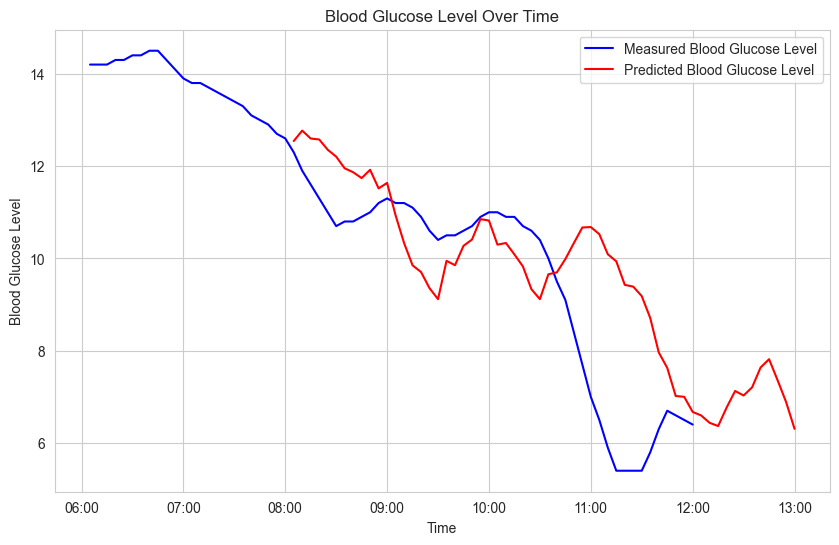

In [10]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(time_series_data['bg'], label='Measured Blood Glucose Level', color='blue')
plt.plot(shifted_prediction_data_model_2['bg+1:00'], label='Predicted Blood Glucose Level', color='red')

plt.xlabel('Time')
plt.ylabel('Blood Glucose Level')
plt.title('Blood Glucose Level Over Time')

plt.legend()

date_format = mdates.DateFormatter("%H:%M")
plt.gca().xaxis.set_major_formatter(date_format)
plt.show()
